In [19]:
import numpy as np
import cv2
from PIL import Image

In [20]:
img = np.array(Image.open("./preprocessed/img_0.jpg"))

In [21]:
# img = np.array(Image.open("./preprocessed/img_436.jpg"))

In [22]:
thresholded = (img < 128)

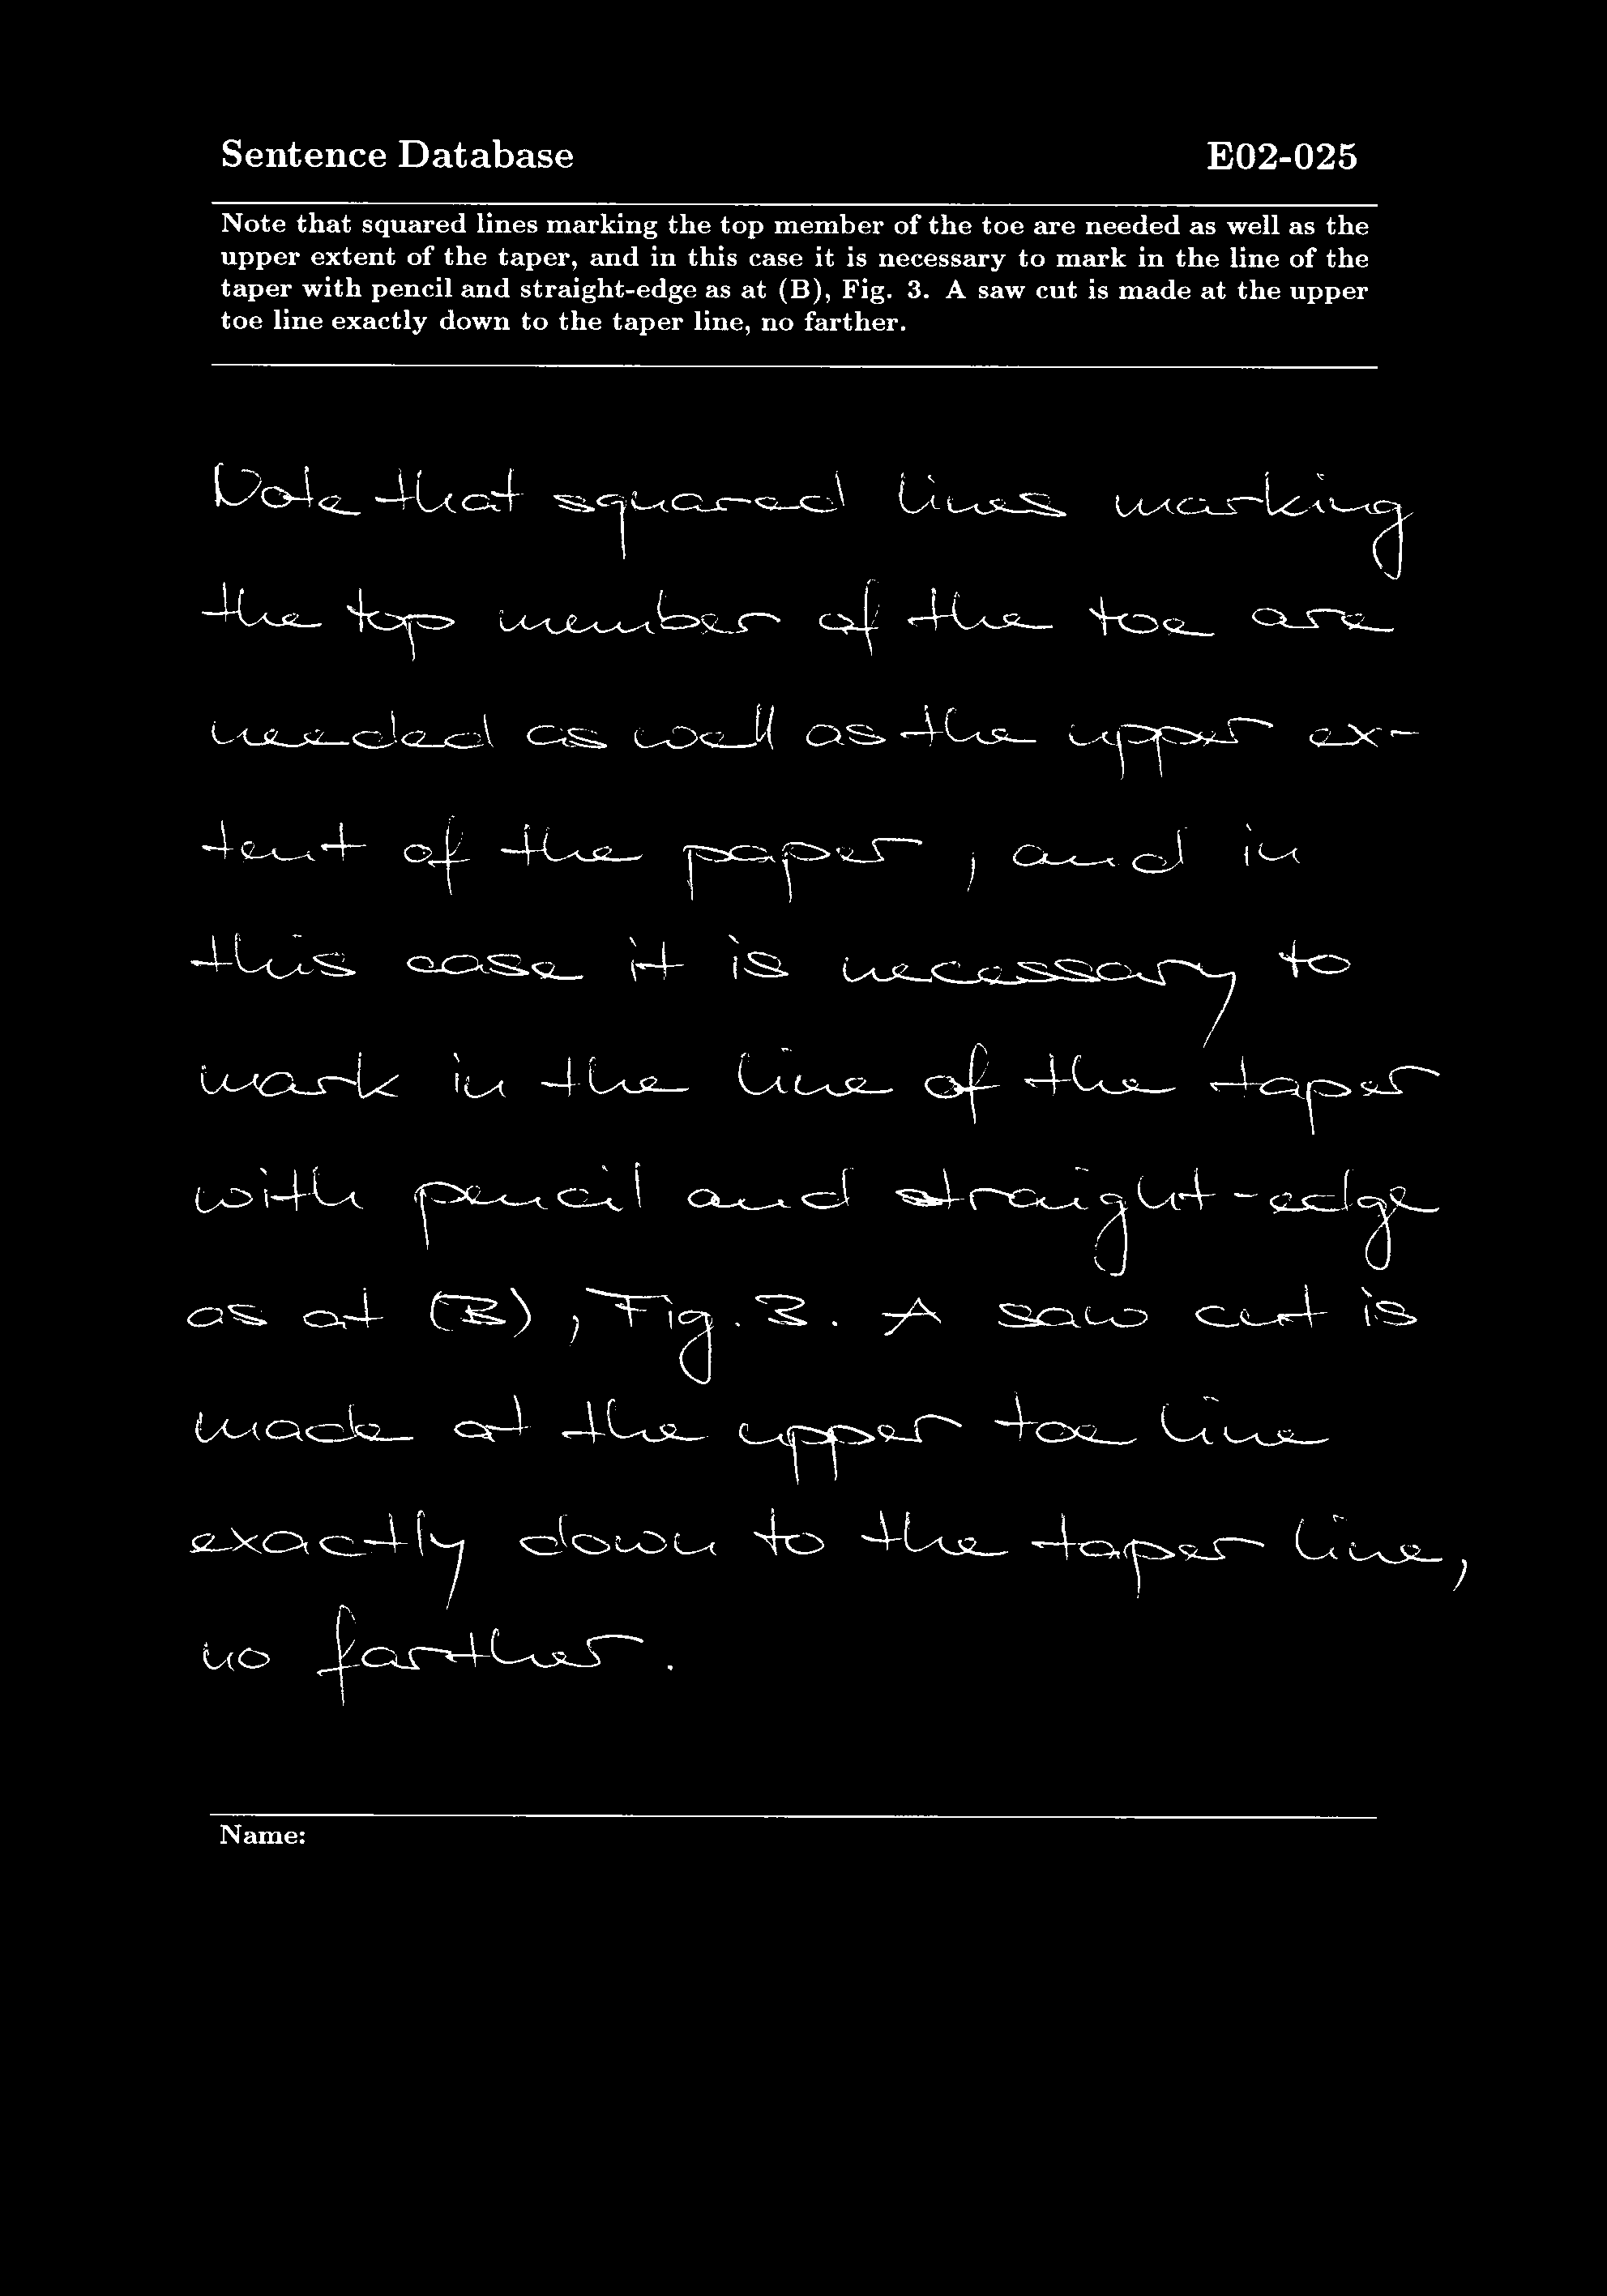

In [23]:
Image.fromarray(thresholded)

In [24]:
text_to_background_ratio = np.sum(thresholded) / np.prod(thresholded.shape)
text_to_background_ratio

0.022897060595720168

In [25]:
length = thresholded.shape[0]
imgOriginal = np.copy(thresholded).astype(np.uint8)

lines = cv2.HoughLines(thresholded.astype(np.uint8), 1, np.pi/180, 300)
print(len(lines))
if(lines is not None):
    for line in lines:
        for rho,theta in line:
            a = np.cos(theta)
            b = np.sin(theta)
            x0 = a*rho
            y0 = b*rho
            x1 = int(x0 + length*(-b))
            y1 = int(y0 + length*(a))
            x2 = int(x0 - length*(-b))
            y2 = int(y0 - length*(a))
            cv2.line(imgOriginal, (x1, y1), (x2, y2), 255, 2)

74


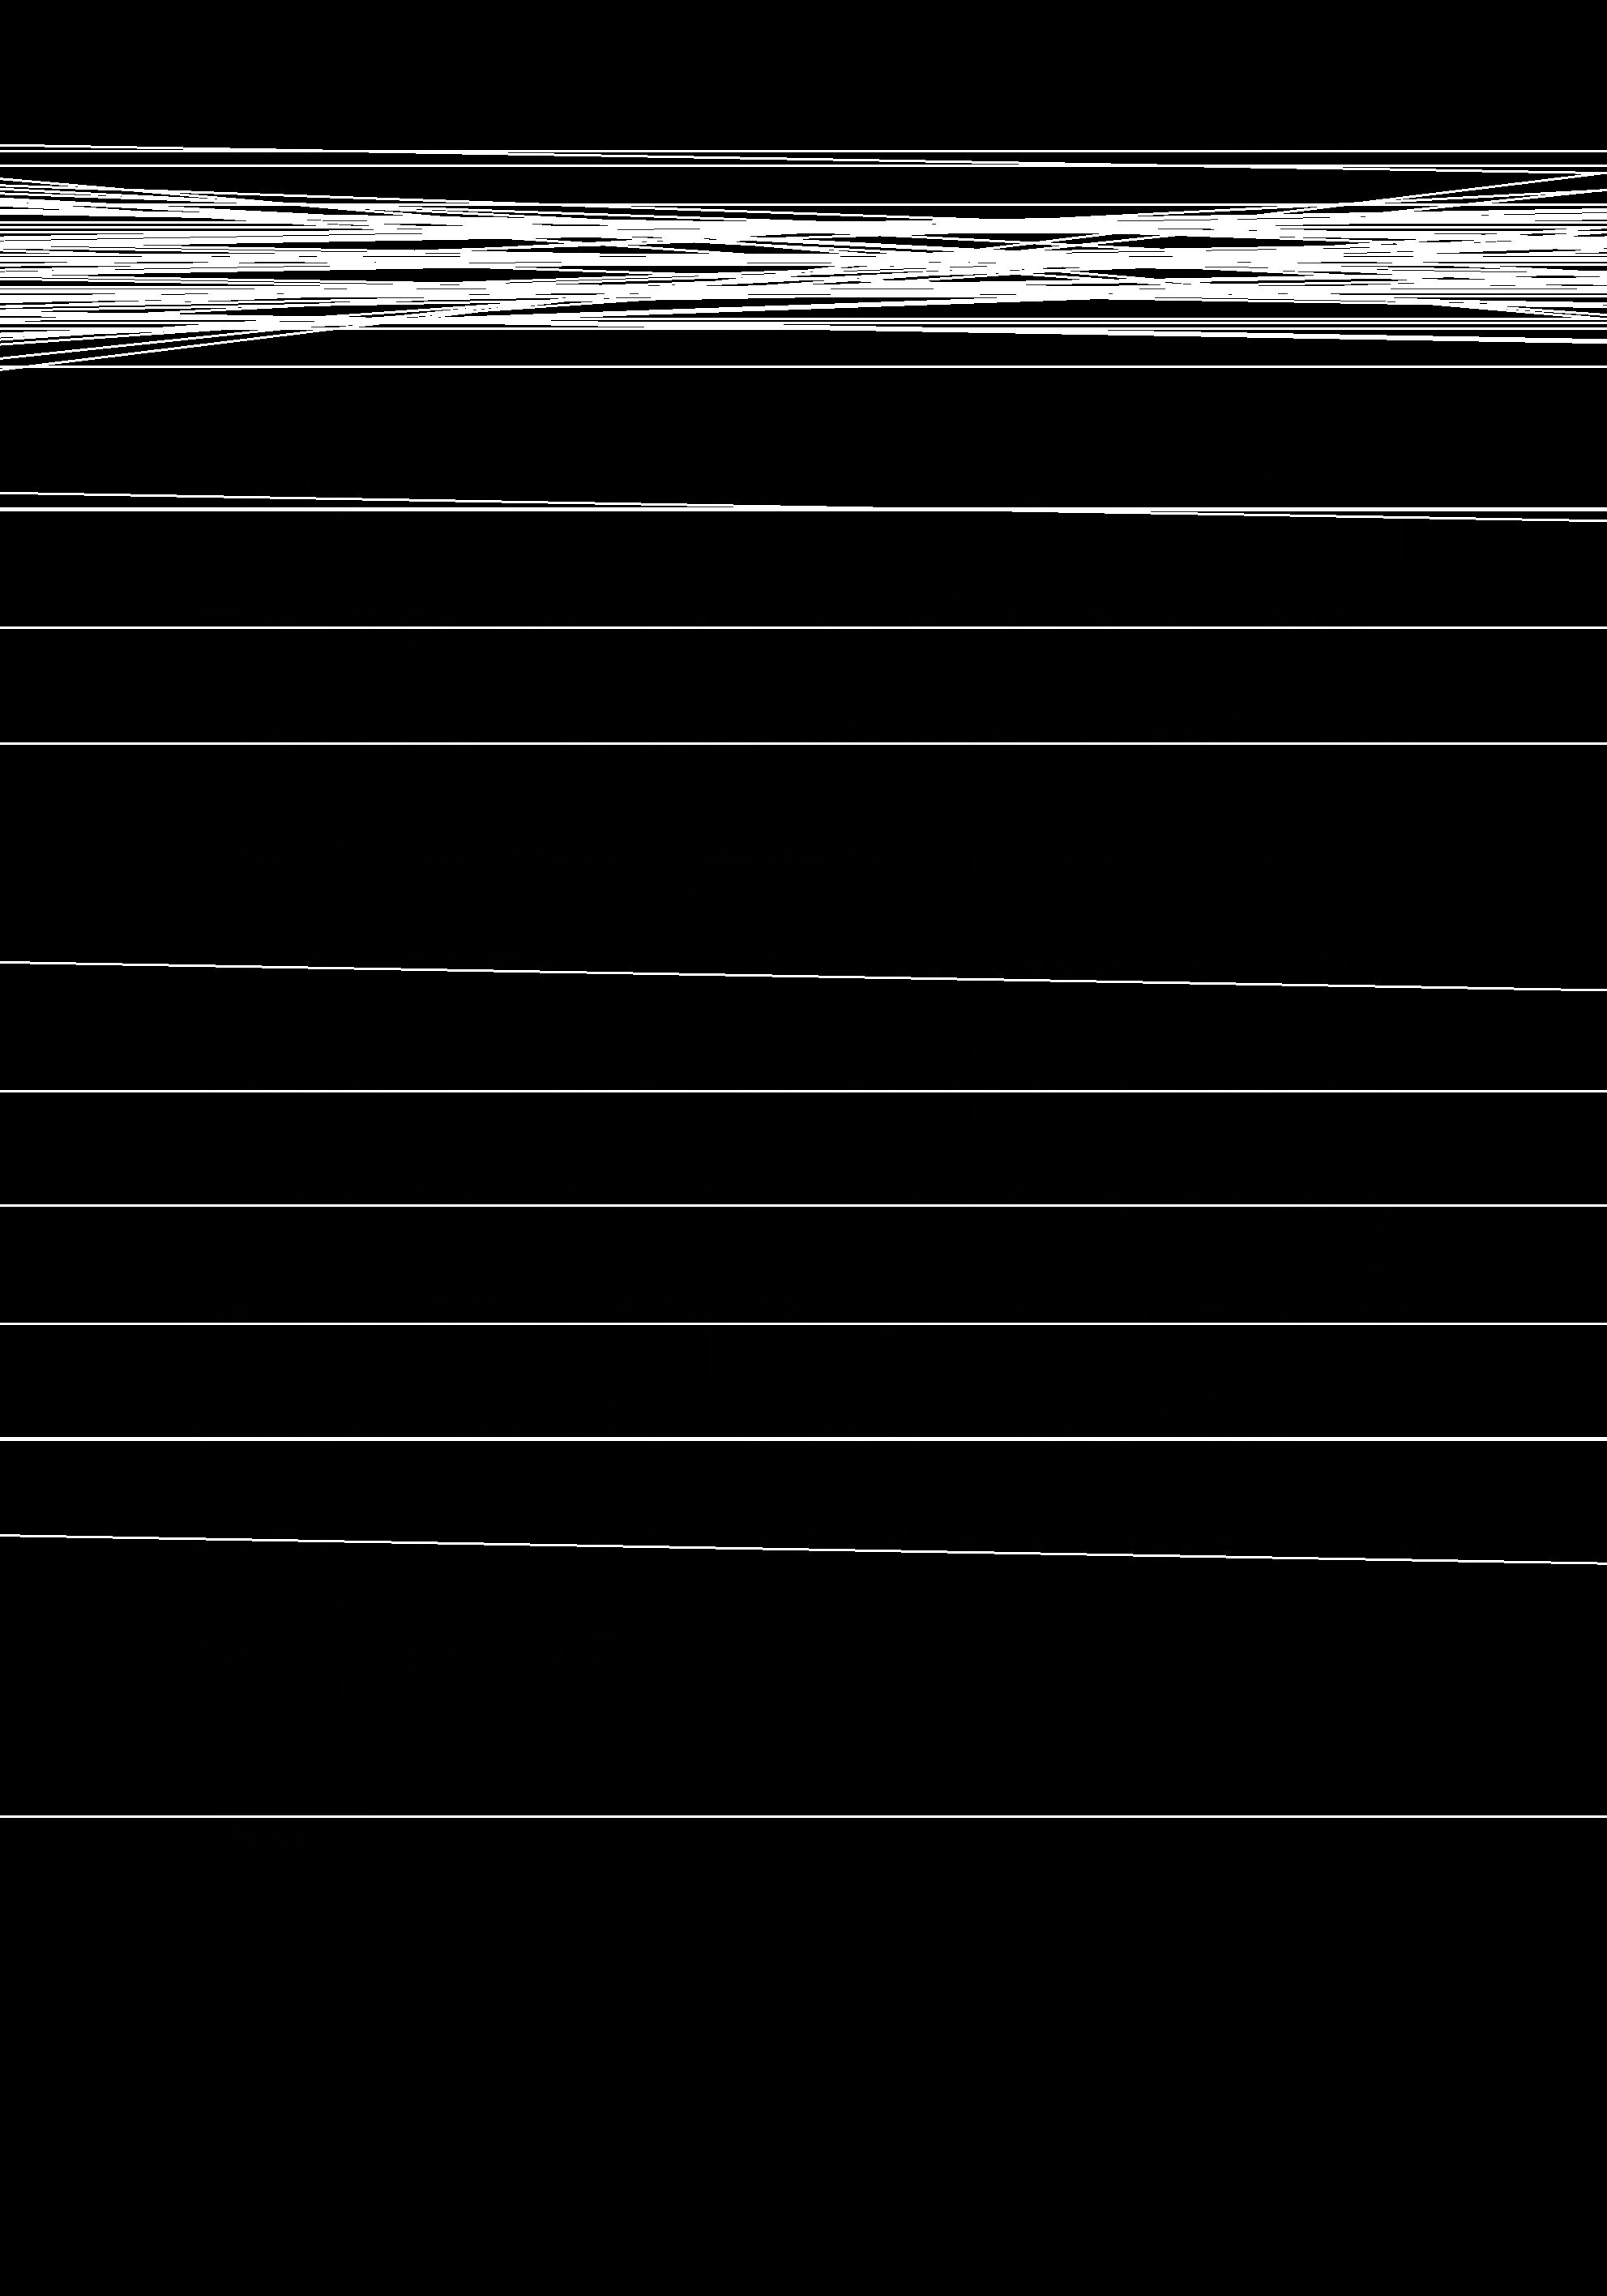

In [26]:
Image.fromarray(imgOriginal)

In [27]:
thresholded.shape[0] / 150

18.886666666666667

In [28]:
min_num_black_pixels = thresholded.shape[1] / 150
min_line_height = thresholded.shape[0] / 150
min_line_padding = 3
black_pixels_per_row = np.sum(thresholded, axis=1)
line_ranges = []
i = 0
while i < len(black_pixels_per_row):
    if black_pixels_per_row[i] > min_num_black_pixels:
        line_start = i
        if len(line_ranges) > 0 and (i - line_ranges[-1][1] < min_line_padding):
            line_start, _ = line_ranges.pop()
        i += 1
        while i < len(black_pixels_per_row) and black_pixels_per_row[i] > min_num_black_pixels:
            i += 1
        if i - line_start > min_line_height:
            line_ranges.append((line_start, i))
    i += 1

print(f'lines: {len(line_ranges)}')
print(line_ranges)

lines: 16
[(172, 209), (263, 294), (303, 334), (342, 375), (382, 413), (579, 638), (726, 785), (881, 924), (1027, 1078), (1174, 1215), (1300, 1356), (1440, 1515), (1589, 1648), (1732, 1784), (1867, 1930), (2017, 2063)]


In [29]:
res = np.copy(img)
for start, end in line_ranges:
    res[start, :] = 0
    res[end, :] = 0
Image.fromarray(res)